# **(ADD THE NOTEBOOK NAME HERE)**

## Objectives

* Write your notebook objective here, for example, "Fetch data from Kaggle and save as raw data", or "engineer features for modelling"

## Inputs

* Write down which data or information you need to run the notebook 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\amron\\Desktop\\DataAnalysisProjects\\car-price-analysis\\car-price-analysis\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\amron\\Desktop\\DataAnalysisProjects\\car-price-analysis\\car-price-analysis'

# Section 1

Section 1 content

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


Import cleaned dataset

In [11]:
cars_df = pd.read_csv("dataset/clean/carprice.csv")
cars_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carbrand
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


Data visualization 

<Axes: title={'center': 'Models per brand'}, xlabel='Count', ylabel='carbrand'>

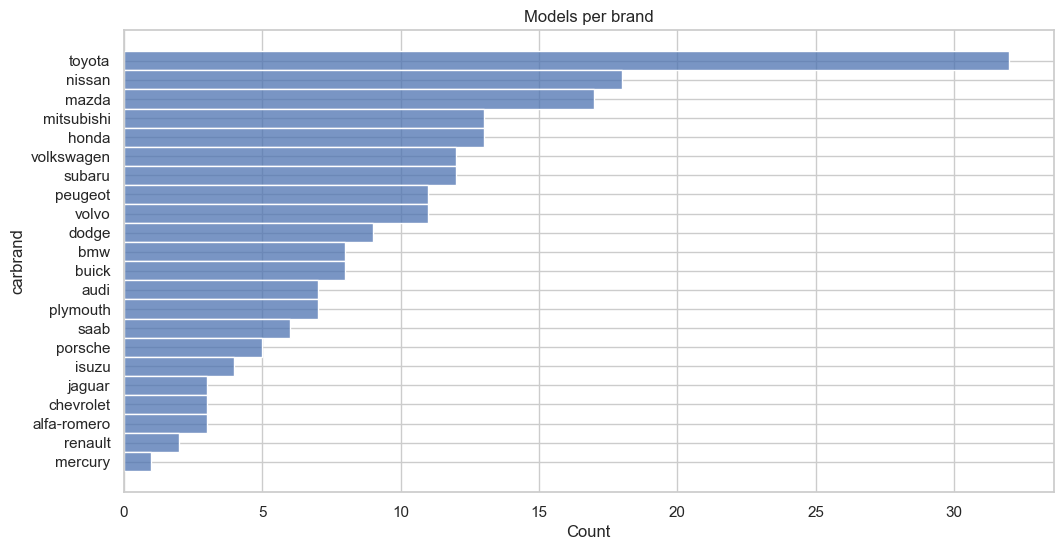

In [12]:
#Chart 1 : car models per brand
brand_counts = cars_df['carbrand'].value_counts().sort_values(ascending=False)
cars_df['carbrand'] = pd.Categorical(cars_df['carbrand'], categories=brand_counts.index, ordered=True)
fig, axes = plt.subplots(figsize=(12, 6))
sns.set_theme(style="whitegrid")
plt.title('Models per brand')
sns.histplot(data=cars_df, y="carbrand")

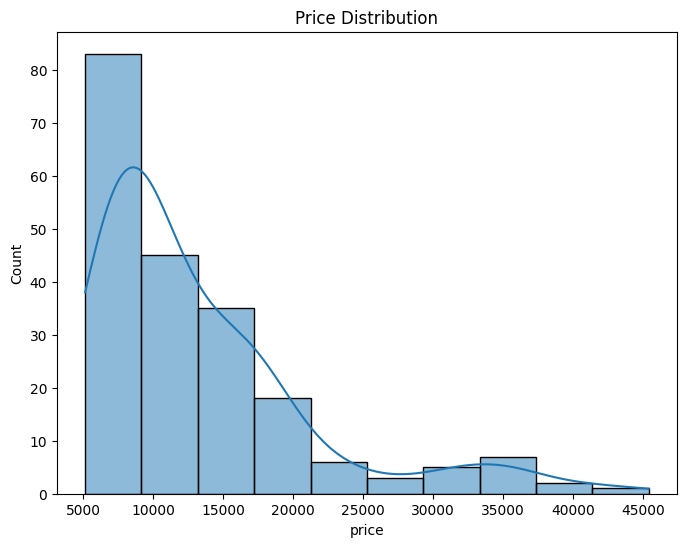

In [ ]:
#Chart 2 : cars price distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=cars_df['price'], bins= 10,kde=True)
plt.title('Price Distribution')
plt.show()

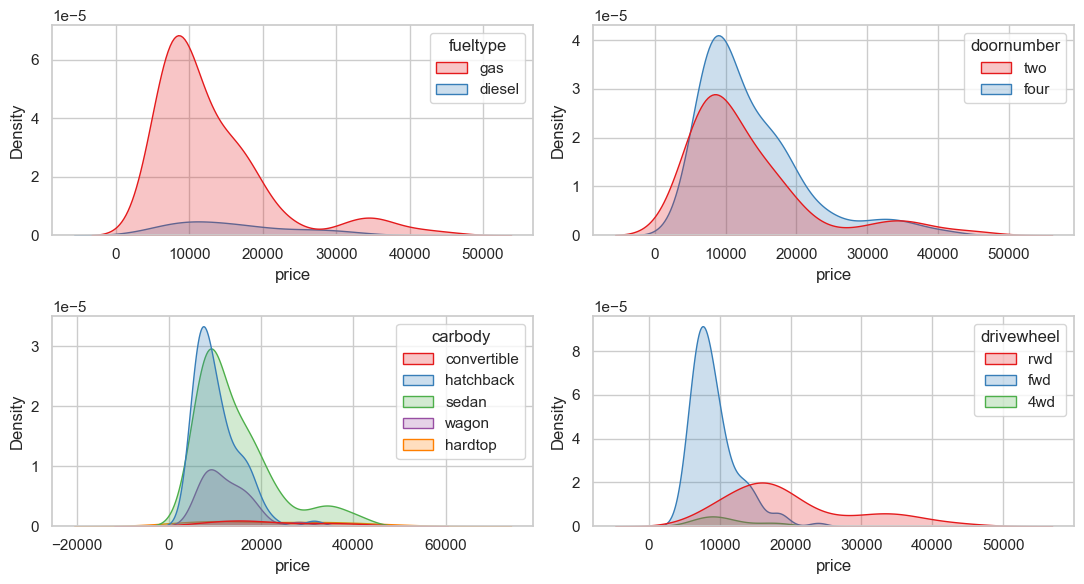

In [13]:
#Chart 3 : distribution of (fuel type, doornumber, carbody , drivewheel) and the price
fig, axes = plt.subplots(nrows=2, ncols=2, figsize =(11,6))
sns.kdeplot(data=cars_df, x='price',hue='fueltype',ax=axes[0,0],fill=True,  palette='Set1')
sns.kdeplot(data=cars_df, x='price',hue='doornumber',ax=axes[0,1],fill=True,  palette='Set1')
sns.kdeplot(data=cars_df, x='price',hue='carbody',ax=axes[1,0],fill=True,  palette='Set1')
sns.kdeplot(data=cars_df, x='price',hue='drivewheel',ax=axes[1,1],fill=True, palette='Set1')
plt.tight_layout()
plt.show()


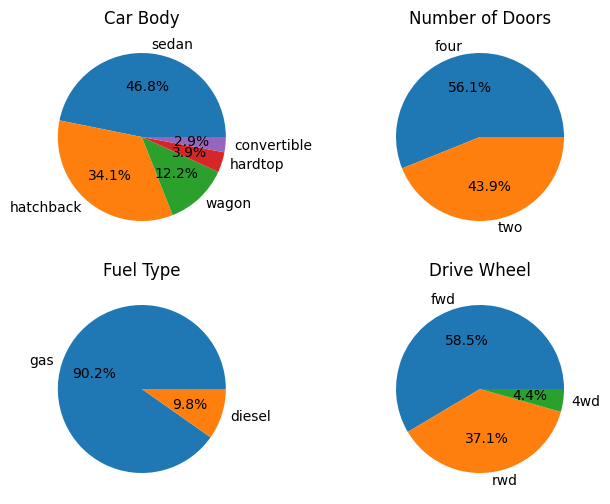

In [ ]:
#Chart 4 : percentage of (car body, number of doors, fuel type, Drive wheel)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize =(8,6))
carbody = cars_df.value_counts('carbody',normalize=True)
doornumber = cars_df.value_counts('doornumber',normalize=True)
fueltype = cars_df.value_counts('fueltype',normalize=True)
drivewheel = cars_df.value_counts('drivewheel',normalize=True)
axes[0,0].pie(x=carbody, labels=carbody.index, autopct='%1.1f%%')
axes[0,0].set_title('Car Body')
axes[0,1].pie(x=doornumber, labels=doornumber.index, autopct='%1.1f%%')
axes[0,1].set_title('Number of Doors')
axes[1,0].pie(x=fueltype, labels=fueltype.index, autopct='%1.1f%%')
axes[1,0].set_title('Fuel Type')
axes[1,1].pie(x=drivewheel, labels=drivewheel.index, autopct='%1.1f%%')
axes[1,1].set_title('Drive Wheel')
plt.show()



---

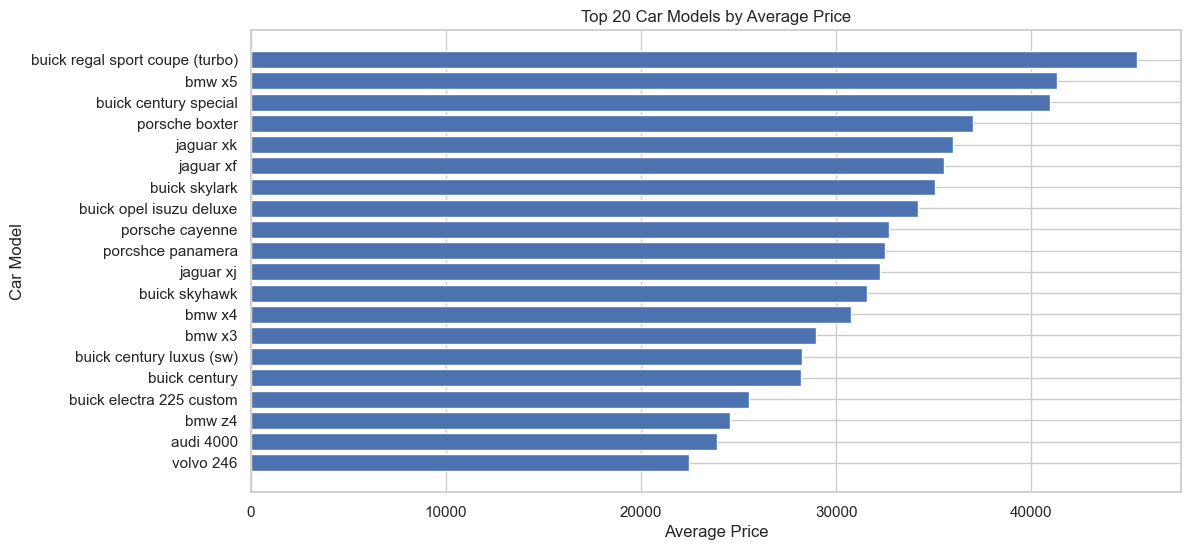

In [ ]:
# Chart 5: top 20 car models by average price
n = 20
avg_car_price = cars_df.groupby('CarName')['price'].mean().sort_values(ascending=False)
top_cars = avg_car_price.head(n)
plt.figure(figsize=(12, 6))
plt.barh(top_cars.index[::-1], top_cars.values[::-1])
plt.title(f'Top {n} Car Models by Average Price')
plt.xlabel('Average Price')
plt.ylabel('Car Model')
plt.show()

C:\Users\amron\AppData\Local\Temp\ipykernel_15092\101180493.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_brand_price = cars_df.groupby('carbrand')['price'].mean().sort_values(ascending=False)


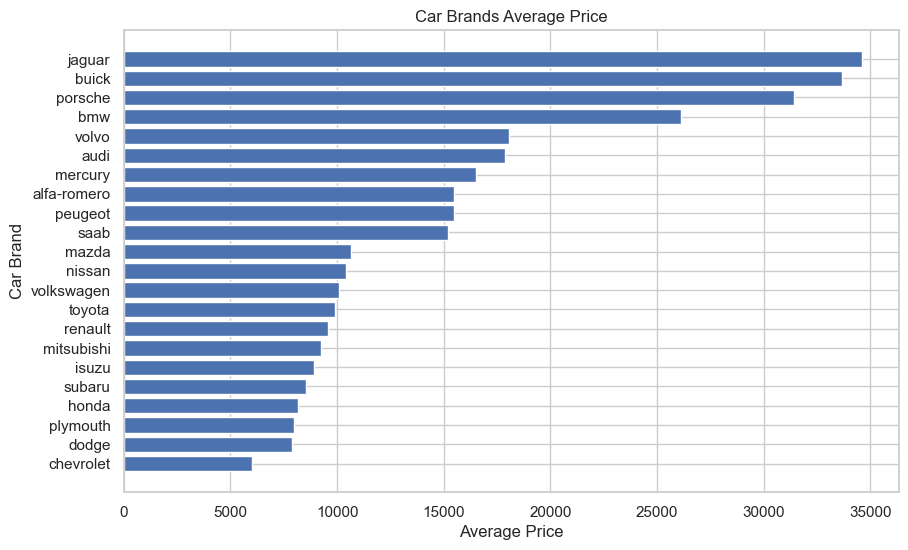

In [ ]:
# Chart 6: car brands average price
avg_brand_price = cars_df.groupby('carbrand')['price'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(avg_brand_price.index[::-1], avg_brand_price.values[::-1]) 
plt.title(f'Car Brands Average Price')
plt.xlabel('Average Price')
plt.ylabel('Car Brand')
plt.show()

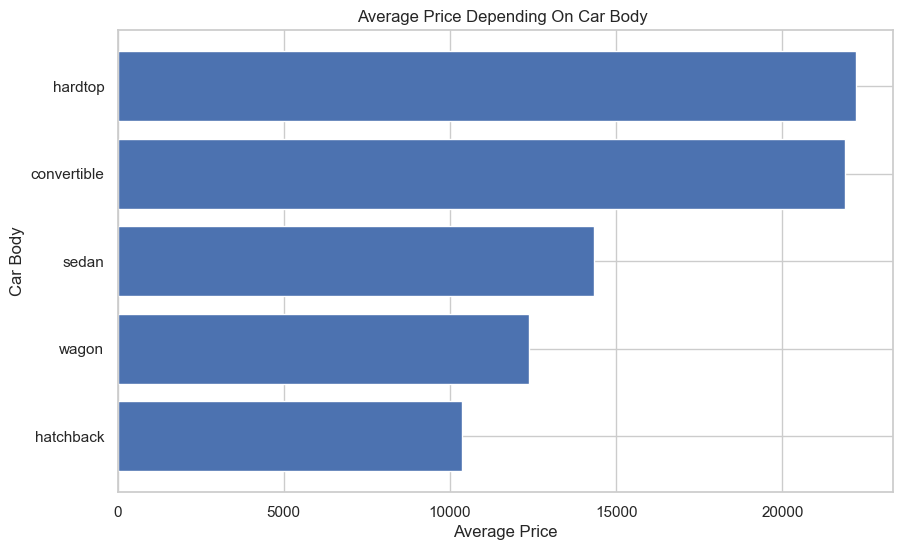

In [ ]:
# Chart 7:  average price depending on car body
avg_carbody_price = cars_df.groupby('carbody')['price'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(avg_carbody_price.index[::-1], avg_carbody_price.values[::-1]) 
plt.title(f'Average Price Depending On Car Body ')
plt.xlabel('Average Price')
plt.ylabel('Car Body')
plt.show()

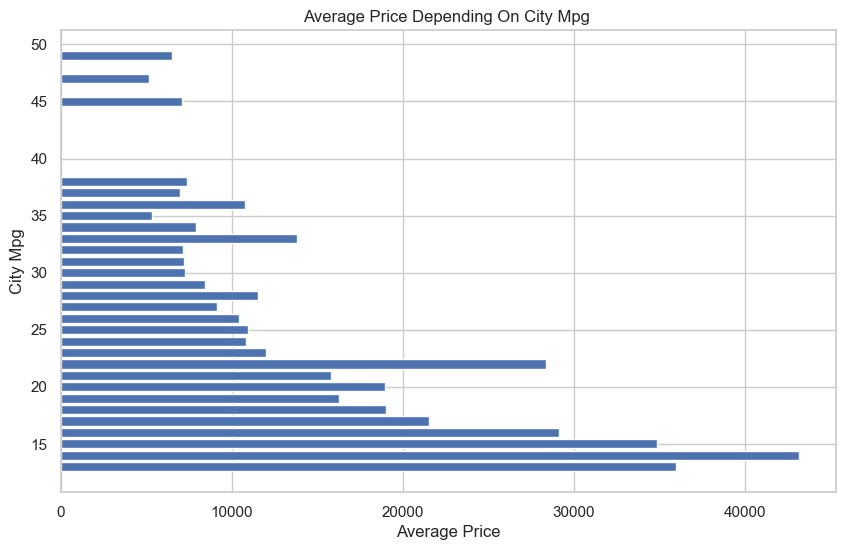

In [30]:
# Chart 9:  average price depending on citympg
avg_citympg_price = cars_df.groupby('citympg')['price'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(avg_citympg_price.index[::-1], avg_citympg_price.values[::-1]) 
plt.title(f'Average Price Depending On City Mpg ')
plt.xlabel('Average Price')
plt.ylabel('City Mpg')
plt.show()

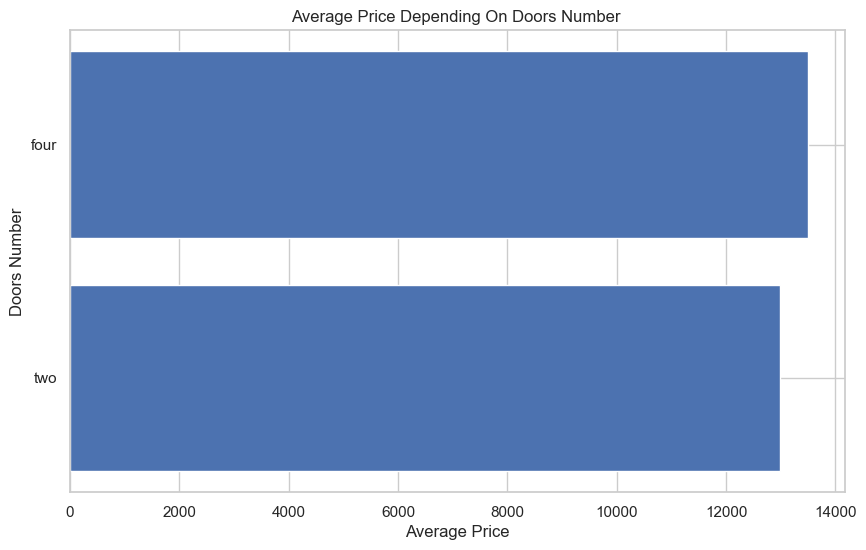

In [35]:
# Chart 10:  average price depending on door number
avg_doornumber_price = cars_df.groupby('doornumber')['price'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(avg_doornumber_price.index[::-1], avg_doornumber_price.values[::-1]) 
plt.title(f'Average Price Depending On Doors Number ')
plt.xlabel('Average Price')
plt.ylabel('Doors Number')
plt.show()

C:\Users\amron\AppData\Local\Temp\ipykernel_15092\3620097424.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price = cars_df.groupby(col)['price'].mean().reset_index()


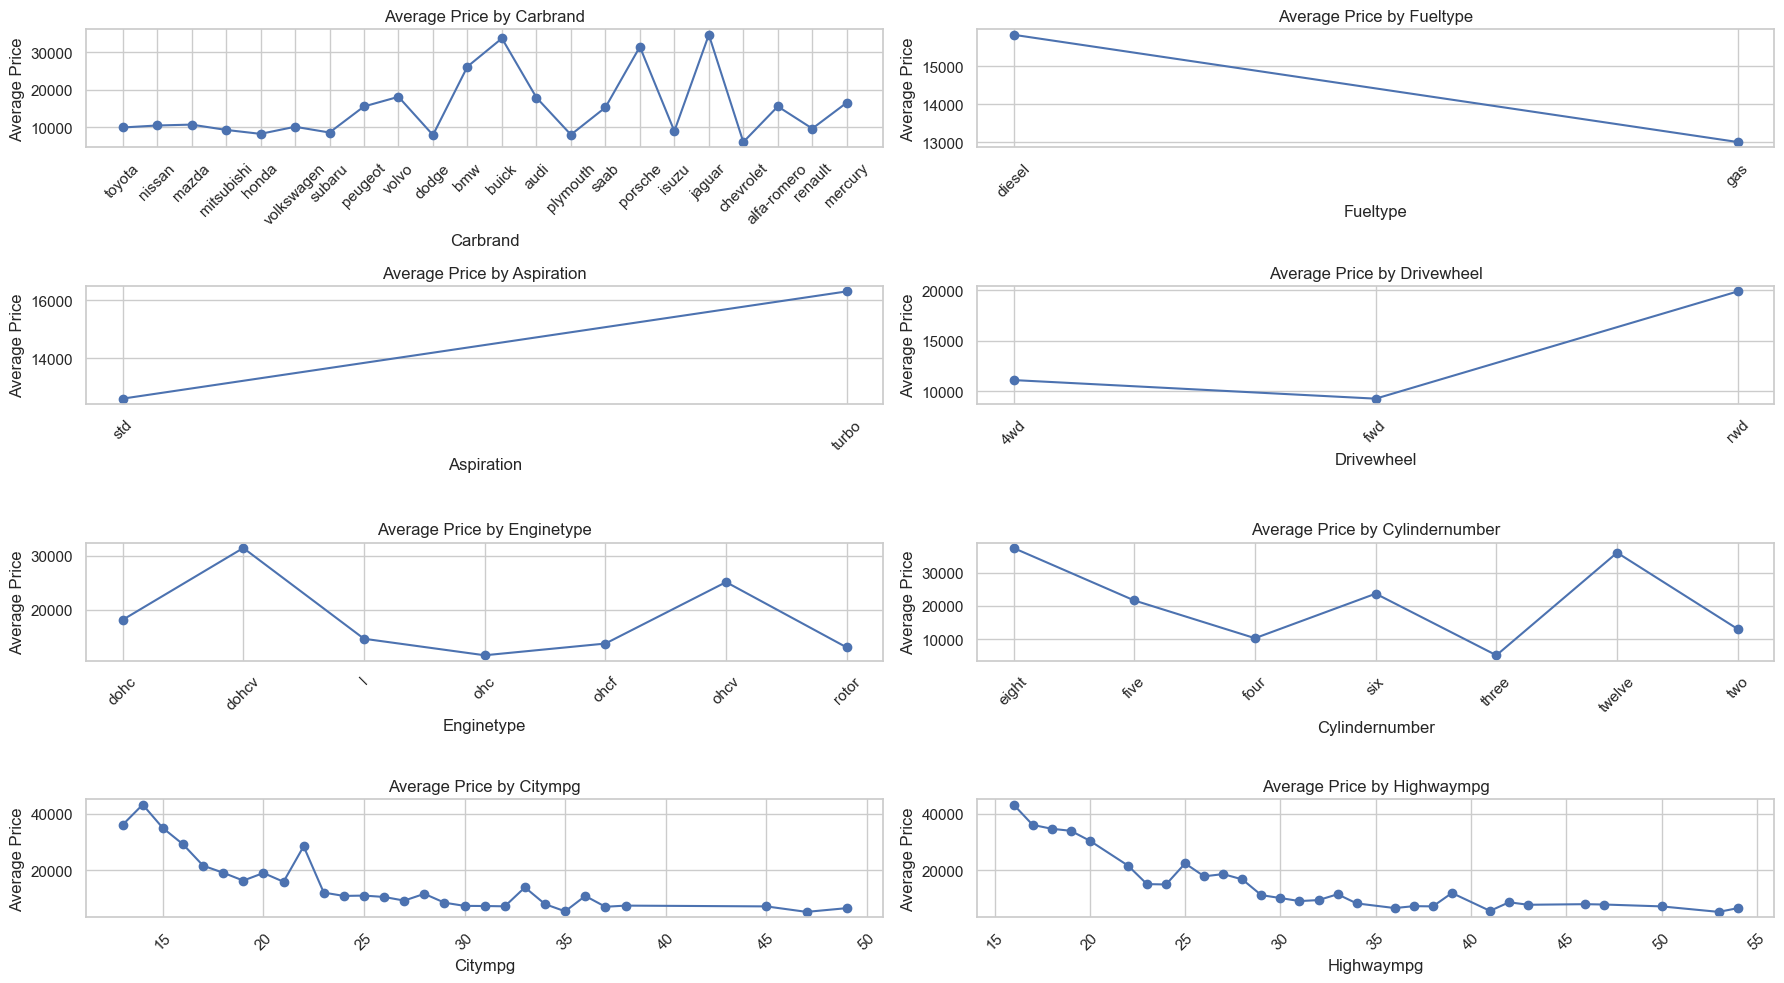

In [ ]:
# Chart 11:  correlation between car functional features and price
categorical_cols = ['carbrand', 'fueltype', 'aspiration', 'drivewheel', 'enginetype', 'cylindernumber', 'citympg', 'highwaympg']

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    avg_price = cars_df.groupby(col)['price'].mean().reset_index()
    axes[i].plot(avg_price[col], avg_price['price'], marker='o')
    axes[i].set_title(f'Average Price by {col.capitalize()}')
    axes[i].set_xlabel(col.capitalize())
    axes[i].set_ylabel('Average Price')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(True)

# Hide any unused subplot (if any)
for j in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

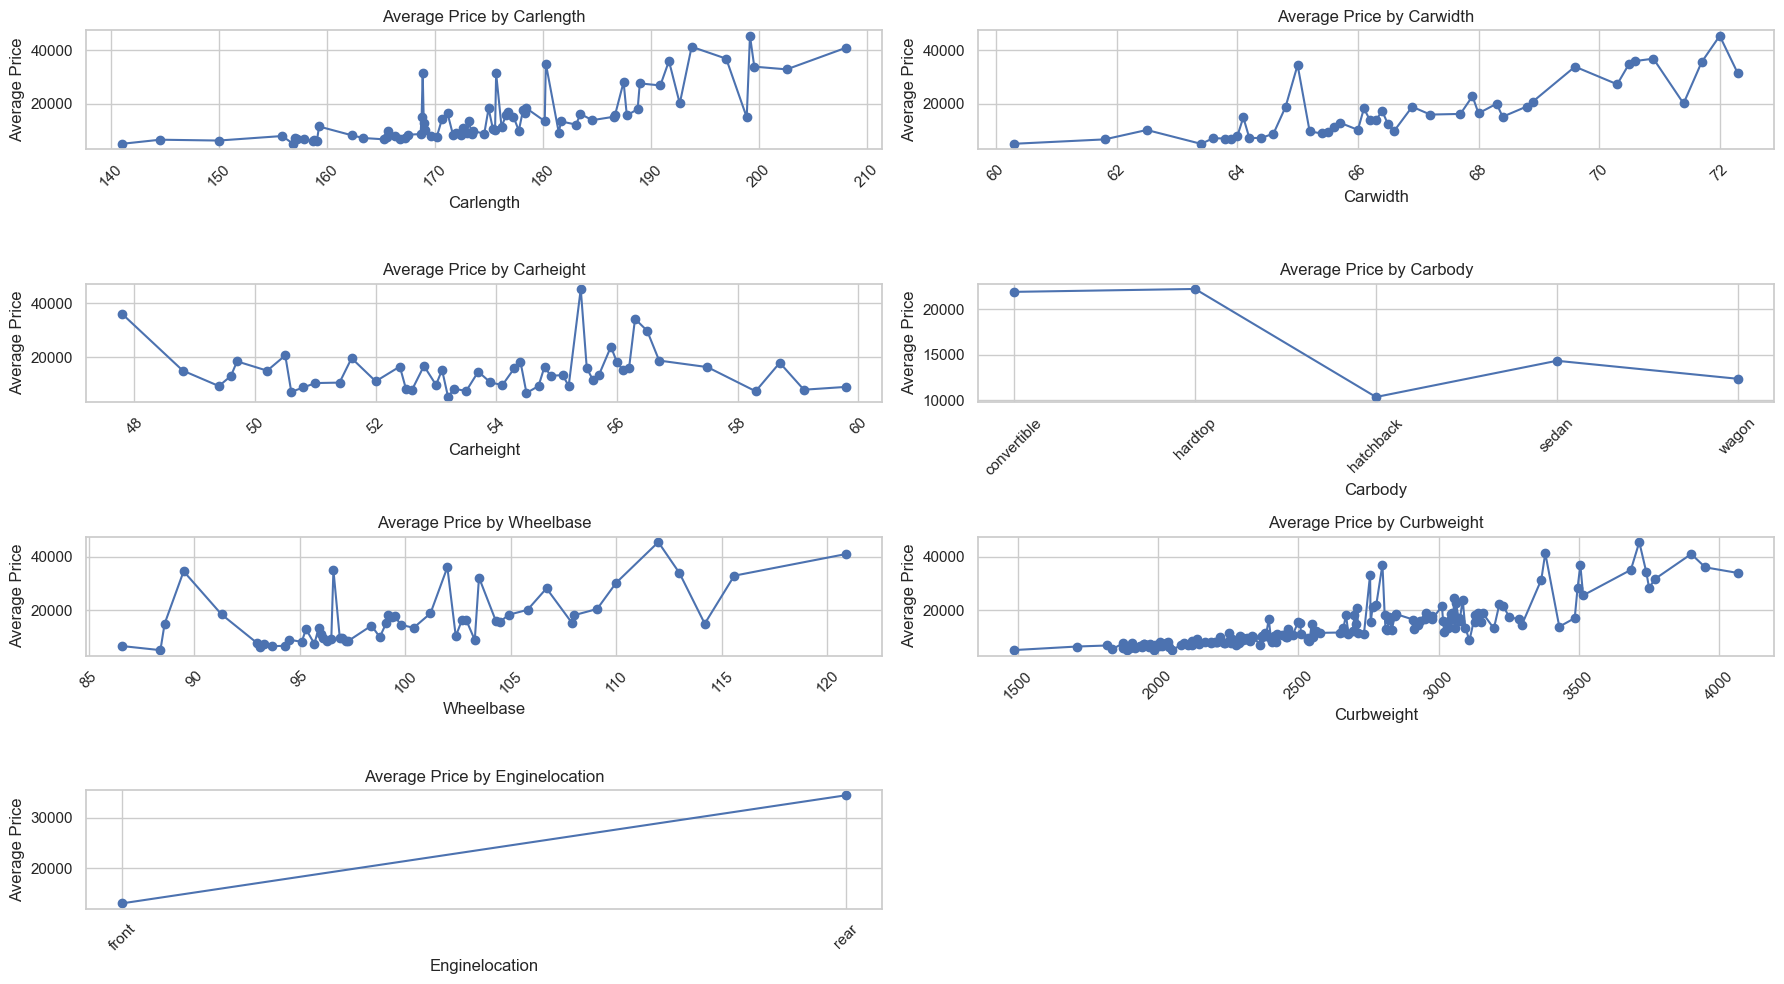

In [ ]:
# Chart 12:  correlation between car features and price
categorical_cols = ['carlength', 'carwidth', 'carheight','carbody', 'wheelbase', 'curbweight','enginelocation' ]

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    avg_price = cars_df.groupby(col)['price'].mean().reset_index()
    axes[i].plot(avg_price[col], avg_price['price'], marker='o')
    axes[i].set_title(f'Average Price by {col.capitalize()}')
    axes[i].set_xlabel(col.capitalize())
    axes[i].set_ylabel('Average Price')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(True)

# Hide any unused subplot (if any)
for j in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Section 2

Section 2 content

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)
